<a href="https://colab.research.google.com/github/Mirocan17/DSA-210-TERM-PROJECT/blob/main/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

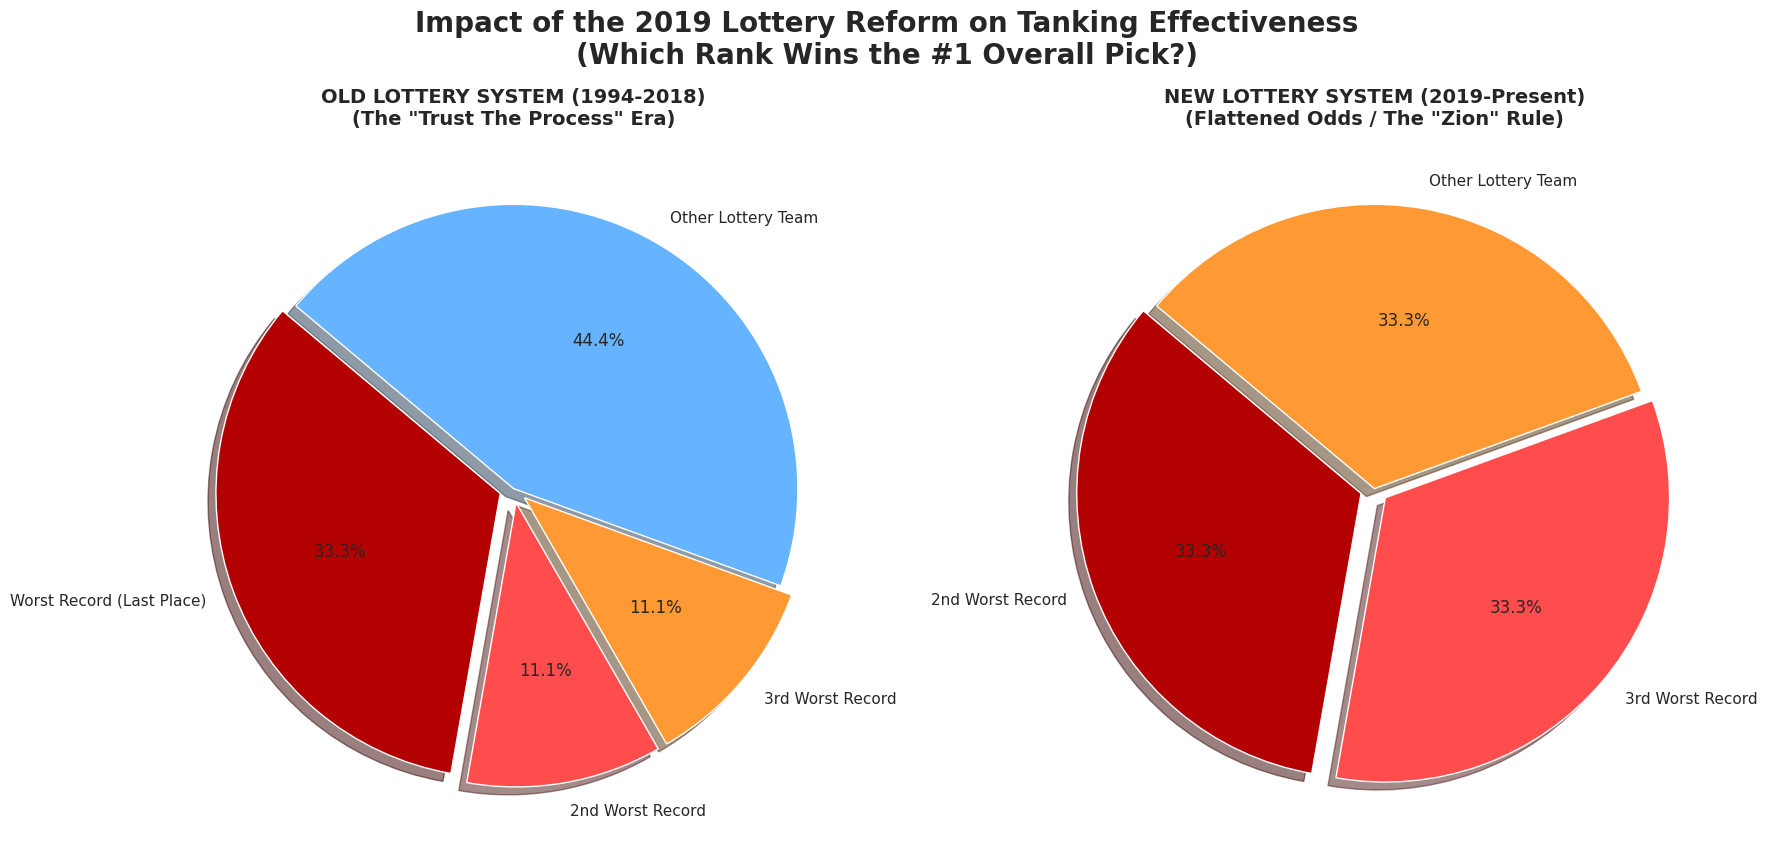

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (16, 8)
try:
    df_draft = pd.read_csv('nba_drafts_1st_round.csv')
    df_standings = pd.read_csv('nba_standings_1994_2025_robust.csv')
    tm_map = {  'MIN': 'Minnesota Timberwolves', 'ORL': 'Orlando Magic', 'WAS': 'Washington Wizards',
        'LAC': 'Los Angeles Clippers', 'GSW': 'Golden State Warriors', 'CLE': 'Cleveland Cavaliers',
        'CHI': 'Chicago Bulls', 'HOU': 'Houston Rockets', 'NJN': 'New Jersey Nets', 'BKN': 'Brooklyn Nets',
        'MIL': 'Milwaukee Bucks', 'NYK': 'New York Knicks', 'TOR': 'Toronto Raptors',
        'POR': 'Portland Trail Blazers', 'SAS': 'San Antonio Spurs', 'PHI': 'Philadelphia 76ers',
        'NOP': 'New Orleans Pelicans', 'NOH': 'New Orleans Hornets', 'CHA': 'Charlotte Bobcats',
        'CHO': 'Charlotte Hornets', 'DET': 'Detroit Pistons', 'PHO': 'Phoenix Suns',
        'BOS': 'Boston Celtics', 'LAL': 'Los Angeles Lakers', 'ATL': 'Atlanta Hawks',
        'UTA': 'Utah Jazz', 'DEN': 'Denver Nuggets', 'MEM': 'Memphis Grizzlies',
        'SAC': 'Sacramento Kings', 'DAL': 'Dallas Mavericks', 'MIA': 'Miami Heat',
        'OKC': 'Oklahoma City Thunder', 'IND': 'Indiana Pacers', 'SEA': 'Seattle SuperSonics',
        'VAN': 'Vancouver Grizzlies' }
    def analyze_era_english(years):
        rank_counts = { 'Worst Record (Last Place)': 0,
            '2nd Worst Record': 0,
            '3rd Worst Record': 0,
            'Other Lottery Team': 0,
            'Playoff Team / Traded Pick': 0 }
        for year in years:
            try:
                season_standings = df_standings[df_standings['Year'] == year].sort_values(by='W', ascending=True).reset_index(drop=True)
                draft_row = df_draft[(df_draft['Year'] == year) & (df_draft['Pk'] == 1)]
                if draft_row.empty: continue
                team_code = draft_row.iloc[0]['Tm']
                team_full = tm_map.get(team_code, team_code)
                if team_full in season_standings['Team'].values:
                    rank_idx = season_standings.index[season_standings['Team'] == team_full][0]
                else:
                    match = season_standings[season_standings['Team'].str.contains(team_full, case=False, na=False)]
                    if not match.empty:
                        rank_idx = match.index[0]
                    else:
                        continue
                if rank_idx == 0: rank_counts['Worst Record (Last Place)'] += 1
                elif rank_idx == 1: rank_counts['2nd Worst Record'] += 1
                elif rank_idx == 2: rank_counts['3rd Worst Record'] += 1
                elif rank_idx < 14: rank_counts['Other Lottery Team'] += 1
                else: rank_counts['Playoff Team / Traded Pick'] += 1
            except:
                continue
        return rank_counts
    era1_counts = analyze_era_english(range(1994, 2019))
    era2_counts = analyze_era_english(range(2019, 2025))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
    colors = ['#b30000', '#ff4d4d', '#ff9933', '#66b3ff', '#cccccc']
    labels1 = [k for k, v in era1_counts.items() if v > 0]
    sizes1 = [v for k, v in era1_counts.items() if v > 0]
    ax1.pie(
        sizes1,
        labels=labels1,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        explode=[0.05 if 'Worst' in l else 0 for l in labels1],
        shadow=True )
    ax1.set_title('OLD LOTTERY SYSTEM (1994-2018)\n(The "Trust The Process" Era)', fontsize=14, fontweight='bold')
    labels2 = [k for k, v in era2_counts.items() if v > 0]
    sizes2 = [v for k, v in era2_counts.items() if v > 0]
    ax2.pie(
        sizes2,
        labels=labels2,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        explode=[0.05 if 'Worst' in l else 0 for l in labels2],
        shadow=True )
    ax2.set_title('NEW LOTTERY SYSTEM (2019-Present)\n(Flattened Odds / The "Zion" Rule)', fontsize=14, fontweight='bold')
    plt.suptitle('Impact of the 2019 Lottery Reform on Tanking Effectiveness\n(Which Rank Wins the #1 Overall Pick?)', fontsize=20, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.savefig('lottery_system_comparison_english.png')
    plt.show()
except Exception as e:
    print(f"Error occurred: {e}")
    print("Please ensure 'nba_drafts_1st_round.csv' and 'nba_standings_1994_2025_robust.csv' are uploaded.")